# Project 1: Sentiment Analysis on Movie Reviews

This project is an individual project. In this project, you are expected to solve the classification problem on movie reviews. Movie reviews have two different sentiments (positive or negative), please train machine learning or deep learning models to classify movie reviews into correct categories (1 for positive 1 and 0 for negative).

**NOTE:**
* Please solve the problems in this notebook using the dataset `IBDM Dataset.csv`.
* Important Dates:
    * Project Start: Feb 19, Monday
    * Project Due: March 7, Thursday midnight
* Submission should include a pdf report (at least 4 pages) and code.
* There are always last minute issues submitting the project. DO NOT WAIT UNTIL THE LAST MINUTE!

**HINT:**
* Here are some related tutorials that would be helpful:
    * https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/code
    * https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html



# Data Exploration: Exploring the Dataset



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_excel("C:/Users/SUNYLoaner/Downloads/IMDB Data.xlsx")

In [3]:
# Convert sentiment column to categorical
data['sentiment'] = data['sentiment'].astype('category')

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [18]:
# Display first 5 rows
print(data.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production br br the filmin...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


In [19]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
review       0
sentiment    0
dtype: int64


In [20]:
# Group data by sentiment and count
sentiment_counts = data['sentiment'].value_counts()

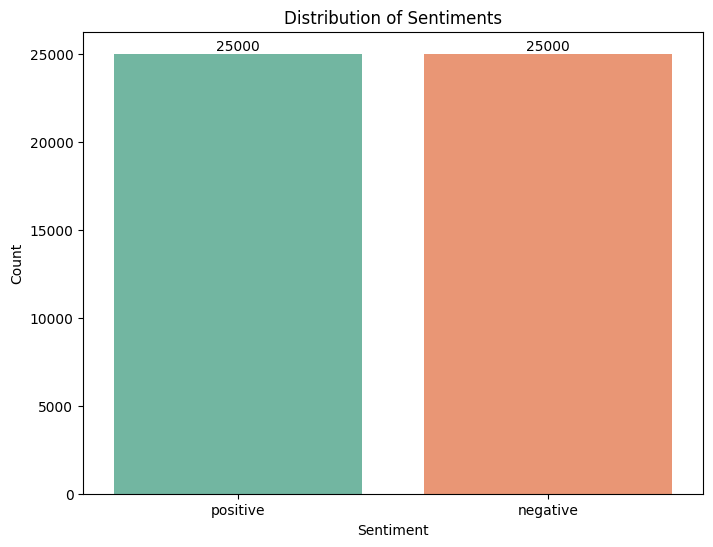

In [27]:
# distribution of sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, hue='sentiment', palette='Set2', legend=False)

plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Add counts
for i, count in enumerate(sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# Data Preproccessing

Here are some common preproccessing steps, feel free to add more preproccessing steps if needed:
1. check missing values.
2. remove noise and special characters, such as "\[[^]]*\]", etc.
3. transform all words to lower case,
4. word tokenization  
5. stop words removing and stemming,
6. divide the dataset into train set (75%) and test set (25%) with random sampling

 ......

**Hint:**
* You may need TfidVectorizer class to convert a collection of raw documents to a matrix of TF-IDF features: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html,
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org).



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re  

In [29]:
data = pd.read_excel("C:/Users/SUNYLoaner/Downloads/IMDB Data.xlsx")

In [30]:
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [31]:
# print missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
review       0
sentiment    0
dtype: int64


In [32]:
# Remove noise and special characters
data['review'] = data['review'].str.replace('[^\w\s]', '', regex=True) 

In [33]:
# Transform all words to lower case
data['review'] = data['review'].str.lower()

In [34]:
# Tokenization
data['review'] = data['review'].apply(lambda x: x.split())

In [35]:
# Divide data into train set (75%) and test set (25%)
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.25, random_state=42)

# Print shape of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (37500,)
Shape of X_test: (12500,)
Shape of y_train: (37500,)
Shape of y_test: (12500,)


# Data Modelling

* Please use the following models to classify the data:
    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".
    * CNN (please use different number of convolutional layers combined with different number of fully-connected layers, and compare the results).


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Text preprocessing
data['review'] = data['review'].str.replace('[^\w\s]', '', regex=True)  # Remove noise and special characters
data['review'] = data['review'].str.lower()  # Transform text to lower case

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.25, random_state=42)

# Model 1: Logistic Regression
lr_model = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=3000))  # Increase max_iter

lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.8916
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      6157
    positive       0.89      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



In [39]:
from sklearn.svm import LinearSVC

# Model 2: Linear SVC
svc_model = make_pipeline(CountVectorizer(), LinearSVC(max_iter=10000, dual=False))
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("Linear SVC Accuracy:", svc_accuracy)
print("Linear SVC Classification Report:")
print(classification_report(y_test, svc_predictions))


Linear SVC Accuracy: 0.8724
Linear SVC Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      6157
    positive       0.87      0.88      0.87      6343

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Model 3: K Neighbors Classifier
knn_model = make_pipeline(CountVectorizer(), KNeighborsClassifier())
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K Neighbors Classifier Accuracy:", knn_accuracy)
print("K Neighbors Classifier Classification Report:")
print(classification_report(y_test, knn_predictions))


K Neighbors Classifier Accuracy: 0.64248
K Neighbors Classifier Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.55      0.60      6157
    positive       0.63      0.73      0.67      6343

    accuracy                           0.64     12500
   macro avg       0.65      0.64      0.64     12500
weighted avg       0.65      0.64      0.64     12500



In [42]:
from sklearn.neural_network import MLPClassifier

# Reduce the training data size
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Reduce vocabulary size
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train_small)
X_test_vec = vectorizer.transform(X_test)

# Simplify model
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=200, alpha=0.0001)

# Train model
mlp_model.fit(X_train_vec, y_train_small)

# Evaluate model
mlp_predictions = mlp_model.predict(X_test_vec)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("Fully-connected Neural Network (MLPClassifier) Accuracy:", mlp_accuracy)
print("Fully-connected Neural Network (MLPClassifier) Classification Report:")
print(classification_report(y_test, mlp_predictions))


Fully-connected Neural Network (MLPClassifier) Accuracy: 0.84096
Fully-connected Neural Network (MLPClassifier) Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.83      0.84      6157
    positive       0.84      0.85      0.84      6343

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizing
vocab_size = 10000  
max_length = 1000  

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Model 
cnn_model = Sequential([
    Embedding(vocab_size, 100, input_length=max_length),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
cnn_model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_pad, y_test)
print("Convolutional Neural Network (CNN) Accuracy:", cnn_accuracy)

# Predictions
cnn_probabilities = cnn_model.predict(X_test_pad)
cnn_predictions = (cnn_probabilities > 0.5).astype(int)

# Classification report
print("Convolutional Neural Network (CNN) Classification Report:")
print(classification_report(y_test, cnn_predictions))


Epoch 1/3
1172/1172 [==============================] - 50s 42ms/step - loss: 0.3858 - accuracy: 0.8213 - val_loss: 0.2694 - val_accuracy: 0.8910
Epoch 2/3
1172/1172 [==============================] - 49s 42ms/step - loss: 0.2150 - accuracy: 0.9209 - val_loss: 0.2496 - val_accuracy: 0.9006
Epoch 3/3
391/391 [==============================] - 5s 13ms/step - loss: 0.2942 - accuracy: 0.8909
Convolutional Neural Network (CNN) Accuracy: 0.8908799886703491
391/391 [==============================] - 5s 12ms/step
Convolutional Neural Network (CNN) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      6157
           1       0.87      0.93      0.90      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


Summary of Model Performance:
                                Model  Accuracy
0                 Logistic Regression   0.89160
1                          Linear SVC   0.87344
2              K Neighbors Classifier   0.64248
3                       MLPClassifier   0.83960
4  Convolutional Neural Network (CNN)   0.89536


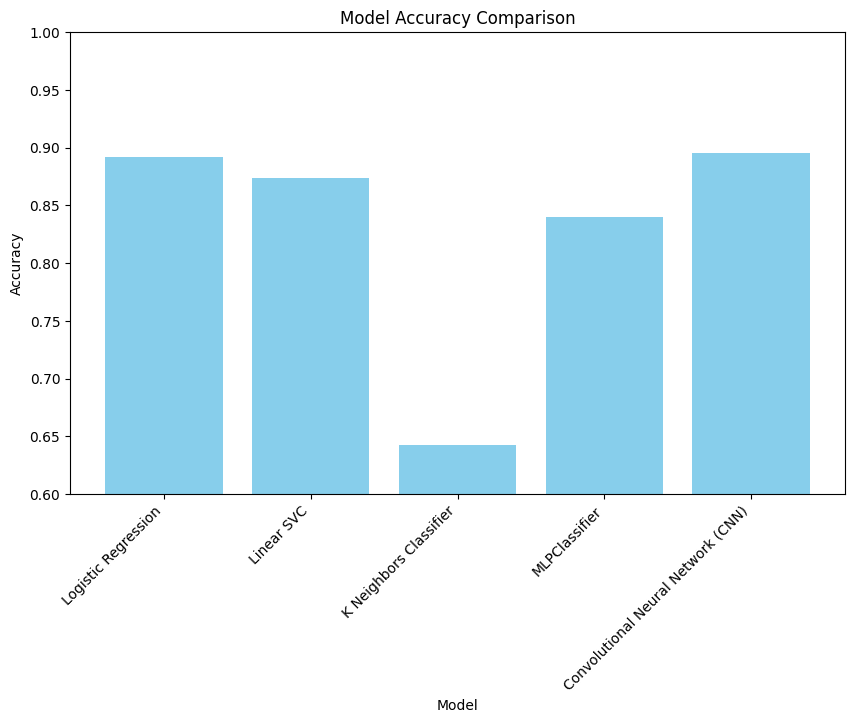

In [12]:
import matplotlib.pyplot as plt

# Summary table
summary_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 'K Neighbors Classifier', 'MLPClassifier', 'Convolutional Neural Network (CNN)'],
    'Accuracy': [lr_accuracy, svc_accuracy, knn_accuracy, mlp_accuracy, cnn_accuracy]
})
print("Summary of Model Performance:")
print(summary_table)

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Model'], summary_table['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.6, 1.0)  # Limit y-axis to better visualize differences
plt.show()


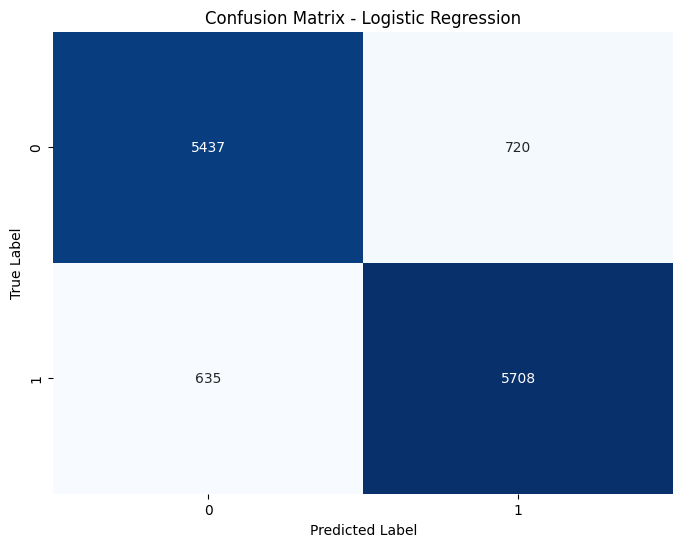

In [47]:
#Confusin Matrix

lr_predictions_int = [1 if label == 'positive' else 0 for label in lr_predictions]

# Calculate confusion matrix for Logistic Regression model
lr_conf_matrix = confusion_matrix(y_test, lr_predictions_int)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

391/391 [==============================] - 5s 12ms/step


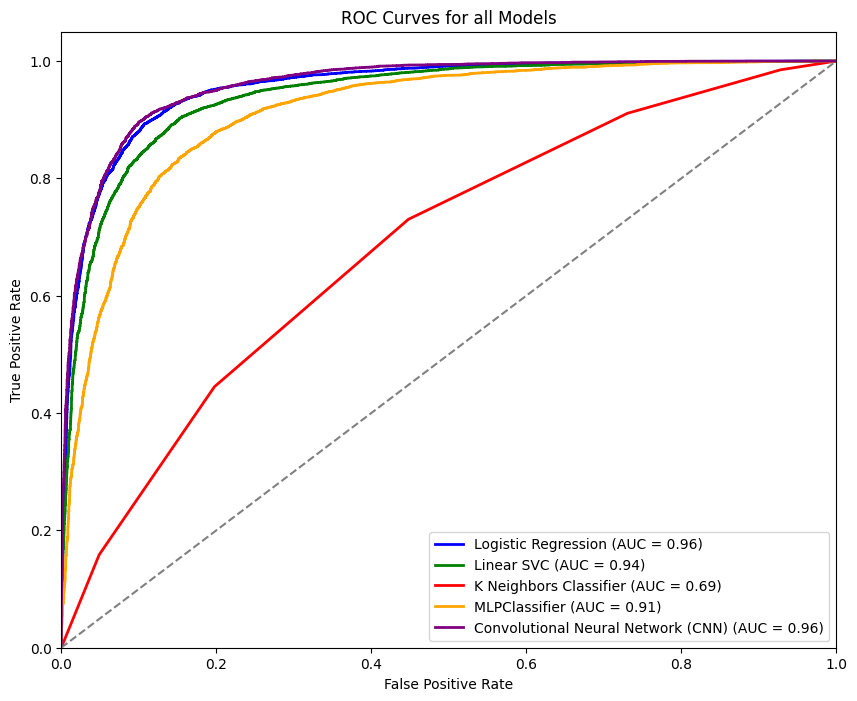

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC curve and AUC for Logistic Regression model
lr_probs = lr_model.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs[:, 1])

# Calculate ROC curve and AUC for Linear SVC model
svc_probs = svc_model.decision_function(X_test)
svc_auc = roc_auc_score(y_test, svc_probs)
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_probs)

# Calculate ROC curve and AUC for K Neighbors Classifier model
knn_probs = knn_model.predict_proba(X_test)
knn_auc = roc_auc_score(y_test, knn_probs[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs[:, 1])

# Calculate ROC curve and AUC for MLPClassifier model
mlp_probs = mlp_model.predict_proba(X_test_vec)
mlp_auc = roc_auc_score(y_test, mlp_probs[:, 1])
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_probs[:, 1])

# Calculate ROC curve and AUC for CNN model
cnn_probs = cnn_model.predict(X_test_pad)
cnn_auc = roc_auc_score(y_test, cnn_probs)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, cnn_probs)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label='Linear SVC (AUC = %0.2f)' % svc_auc)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='K Neighbors Classifier (AUC = %0.2f)' % knn_auc)
plt.plot(fpr_mlp, tpr_mlp, color='orange', lw=2, label='MLPClassifier (AUC = %0.2f)' % mlp_auc)
plt.plot(fpr_cnn, tpr_cnn, color='purple', lw=2, label='Convolutional Neural Network (CNN) (AUC = %0.2f)' % cnn_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all Models')
plt.legend(loc='lower right')
plt.show()


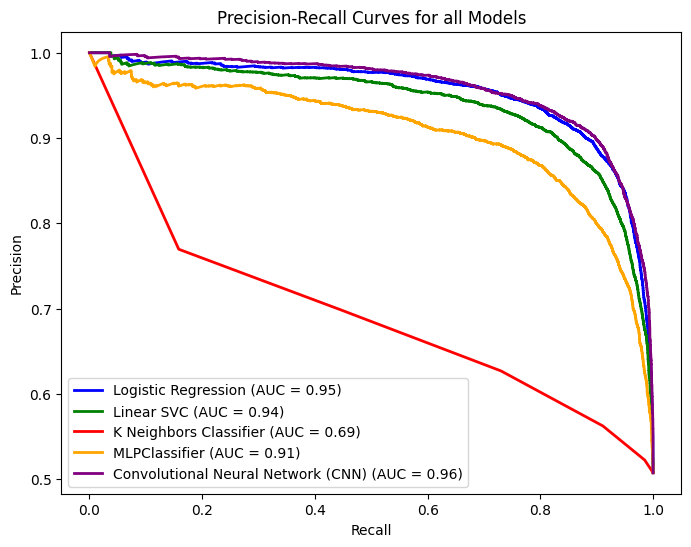

In [61]:
#precison recall curve
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve and AUC for Linear SVC model
svc_probs_positive = svc_probs  # Linear SVC already provides decision function
svc_precision, svc_recall, _ = precision_recall_curve(y_test, svc_probs_positive)
svc_auc = auc(svc_recall, svc_precision)

# Calculate precision-recall curve and AUC for K Neighbors Classifier model
knn_probs_positive = knn_probs[:, 1]  # Select probabilities for class 1 (positive class)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs_positive)
knn_auc = auc(knn_recall, knn_precision)

# Calculate precision-recall curve and AUC for MLPClassifier model
mlp_probs_positive = mlp_probs[:, 1]  # Select probabilities for class 1 (positive class)
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, mlp_probs_positive)
mlp_auc = auc(mlp_recall, mlp_precision)

# Calculate precision-recall curve and AUC for CNN model
cnn_probs_positive = cnn_probs  # CNN already provides probabilities for class 1 (positive class)
cnn_precision, cnn_recall, _ = precision_recall_curve(y_test, cnn_probs_positive)
cnn_auc = auc(cnn_recall, cnn_precision)

# Plot precision-recall curves for all models
plt.figure(figsize=(8, 6))
plt.plot(lr_recall, lr_precision, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(svc_recall, svc_precision, color='green', lw=2, label='Linear SVC (AUC = %0.2f)' % svc_auc)
plt.plot(knn_recall, knn_precision, color='red', lw=2, label='K Neighbors Classifier (AUC = %0.2f)' % knn_auc)
plt.plot(mlp_recall, mlp_precision, color='orange', lw=2, label='MLPClassifier (AUC = %0.2f)' % mlp_auc)
plt.plot(cnn_recall, cnn_precision, color='purple', lw=2, label='Convolutional Neural Network (CNN) (AUC = %0.2f)' % cnn_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for all Models')
plt.legend(loc='lower left')
plt.show()




# Done

All set!

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook. Please make sure all the plotted tables and figures are in the notebook.

* **PDF Report**: please prepare a report in the PDF form which should be at least 4 pages. The report should includes:

  * Data description and exploration.

  * Data preproccessing.

  * Data modelling.

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)
  
Please compress all the files in a zipped file.